In [6]:
import pandas as pd
import logging
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
logger = logging.getLogger('my_logger')

In [22]:
logger.setLevel(logging.INFO) #Only log messages with INFO level or above will be displayed

In [23]:
#Handlers
console_handler = logging.StreamHandler()
file_handler = logging.FileHandler('app.log')

logger.addHandler(console_handler)
logger.addHandler(file_handler)

In [32]:
# Formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

In [39]:
# Load dataset
logger.info("Loading dataset...")
data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/TSLA.csv')
data

2024-02-22 04:39:12,265 - INFO - Loading dataset...
INFO:my_logger:Loading dataset...


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [35]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [69]:
data['Date'] = pd.to_datetime(data['Date'])

In [70]:
logger.info("Chech the data types...")
data.info()

2024-02-22 05:08:25,943 - INFO - Chech the data types...
INFO:my_logger:Chech the data types...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [44]:
logger.info("Check the null values...")
data.isnull().sum()

2024-02-22 04:45:09,324 - INFO - Check the null values...
INFO:my_logger:Check the null values...


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

2024-02-22 04:46:39,613 - INFO - Checking the outliers...
INFO:my_logger:Checking the outliers...


<Axes: >

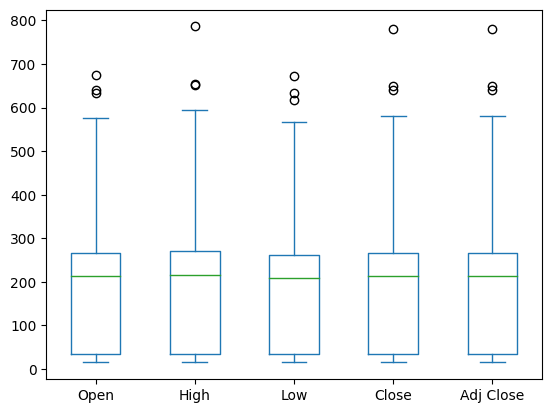

In [45]:
logger.info("Checking the outliers...")
data[['Open', 'High', 'Low', 'Close','Adj Close']].plot(kind='box')

In [71]:
# Assuming 'data' has features and target columns
# Extract features (X) and target (y)
logger.info("Splitting data in to X and y...")
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

2024-02-22 05:10:28,876 - INFO - Splitting data in to X and y...
INFO:my_logger:Splitting data in to X and y...


In [72]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as  mse
from sklearn.metrics import r2_score

In [73]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))


X_train shape: (1691, 1)
X_test shape: (725, 1)
y_train length: 1932
y_test length: 484


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
print(type(X_train))

<class 'numpy.ndarray'>


In [76]:
#feature scaling
logger.info("Feature scaling...")
scaler = StandardScaler().fit(X_train)

2024-02-22 05:11:12,833 - INFO - Feature scaling...
INFO:my_logger:Feature scaling...


In [80]:
#creating a linear model
logger.info("linear model...")
lm = LinearRegression()
lm.fit(X_train,Y_train)

2024-02-22 05:12:32,780 - INFO - linear model...
INFO:my_logger:linear model...


LinearRegression()

In [81]:
# Train a logistic regression model
logger.info("Training logistic regression model...")
model = LogisticRegression(max_iter=1000)


2024-02-22 05:12:52,103 - INFO - Training logistic regression model...
INFO:my_logger:Training logistic regression model...


In [84]:
logger.info("calculate scores for model evaluation...")
#calculate scores for model evaluation
scores = f'''
{'Metrics'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)
# Apply center() to strings


2024-02-22 05:15:04,606 - INFO - calculate scores for model evaluation...
INFO:my_logger:calculate scores for model evaluation...



Metrics          Train                Test        
r2_score  0.788228331751714	0.8024543287892049
MSE       3018.796360995388	2768.704187535219

